# CS 1656 – Introduction to Data Science (Fall 2019) 

## Instructor: Alexandros Labrinidis / Teaching Assistant: Xiaoting Li

## Term Project 

**Released: November 20, 2019**

**Due: December 10, 2019**

In [903]:
# Your name: <FILL HERE>
# Your github ID: <FILL HERE>
# Your pitt username: <FILL HERE>

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikeviz.ipynb` that will:
* [Task 1] access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [904]:
import matplotlib.pyplot as plt
import pandas as pd

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [905]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

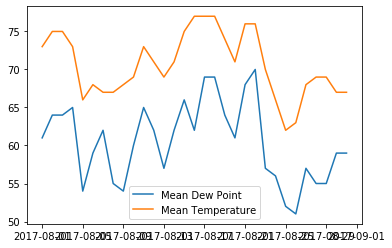

In [906]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('http://data.cs1656.org/KPIT_Aug17.csv',\
                       sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data.

### Task 1.1

In [907]:
import json
import csv
from requests import get
import requests
import numpy as np              
import pandas as pd

In [908]:
df = pd.read_csv('HealthyRideRentals2019-Q1.csv')
df
df2 = pd.read_csv('HealthyRideRentals2019-Q2.csv')
df2
df3 = pd.read_csv('HealthyRideRentals2019-Q3.csv')
df3

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,76836470,7/1/19 0:26,7/1/19 0:28,70175,128,1036.0,Schenley Dr at Schenley Plaza (Carnegie Librar...,1036.0,Schenley Dr at Schenley Plaza (Carnegie Librar...,Subscriber
1,76836841,7/1/19 0:34,7/1/19 0:51,70538,1030,1037.0,Frew St & Schenley Dr,1070.0,Hobart St & Wightman St,Subscriber
2,76840839,7/1/19 1:29,7/1/19 1:39,70383,609,1033.0,Ivy St & Walnut St,1021.0,Taylor St & Liberty Ave,Subscriber
3,76841994,7/1/19 1:39,7/1/19 1:49,70597,604,1021.0,Taylor St & Liberty Ave,1017.0,21st St & Penn Ave,Subscriber
4,76850867,7/1/19 3:02,7/1/19 3:11,70203,554,NaN,BIKE 70203,1046.0,S 25th St & E Carson St,Customer
...,...,...,...,...,...,...,...,...,...,...
45977,86541515,9/30/19 23:50,10/1/19 0:07,70002,1053,1020.0,42nd & Penn Ave.,1066.0,N Homewood Ave & Finance St (Homewood Station),Subscriber
45978,86541527,9/30/19 23:50,9/30/19 23:58,70238,457,NaN,BIKE 70238,1093.0,S Bouquet Ave & Sennott St,Subscriber
45979,86541540,9/30/19 23:51,9/30/19 23:56,70441,317,1049.0,S 12th St & E Carson St,NaN,BIKE 70441,Customer
45980,86541589,9/30/19 23:54,10/1/19 0:48,70687,3267,1099.0,Forbes Ave & S Craig St,NaN,BIKE 70687,Customer


In [909]:
df = pd.concat([df, df2, df3], ignore_index=True)

In [910]:
df

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,63918850,1/5/19 16:02,1/5/19 17:35,70585,5624,1025.0,Penn Ave & N Fairmount St,1025.0,Penn Ave & N Fairmount St,Customer
1,63920576,1/5/19 21:18,1/5/19 21:22,70585,232,1025.0,Penn Ave & N Fairmount St,1026.0,Penn Ave & S Whitfield St,Customer
2,64076019,1/15/19 14:09,1/15/19 14:20,70147,705,1028.0,Penn Ave & Putnam St (Bakery Square),49371.0,E Liberty Blvd & Larimer Ave,Customer
3,64281721,1/28/19 16:34,1/28/19 17:27,70658,3201,1041.0,Fifth Ave & S Bouquet St,1066.0,N Homewood Ave & Finance St (Homewood Station),Subscriber
4,64316376,1/30/19 17:52,1/30/19 19:05,70206,4361,1047.0,S 22nd St & E Carson St,49771.0,Fifth Ave & Jumonville St,Customer
...,...,...,...,...,...,...,...,...,...,...
92118,86541515,9/30/19 23:50,10/1/19 0:07,70002,1053,1020.0,42nd & Penn Ave.,1066.0,N Homewood Ave & Finance St (Homewood Station),Subscriber
92119,86541527,9/30/19 23:50,9/30/19 23:58,70238,457,NaN,BIKE 70238,1093.0,S Bouquet Ave & Sennott St,Subscriber
92120,86541540,9/30/19 23:51,9/30/19 23:56,70441,317,1049.0,S 12th St & E Carson St,NaN,BIKE 70441,Customer
92121,86541589,9/30/19 23:54,10/1/19 0:48,70687,3267,1099.0,Forbes Ave & S Craig St,NaN,BIKE 70687,Customer


In [911]:
df = df.sort_values(by=["Bikeid",'Starttime'])

In [912]:
df = df.reset_index(drop=True)

In [913]:
df

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,77159007,7/3/19 10:16,7/3/19 10:18,20135,146,90097.0,nextbike IT Daniel Hofmann,90097.0,nextbike IT Daniel Hofmann,Customer
1,77154714,7/3/19 9:52,7/3/19 9:53,20135,85,90097.0,nextbike IT Daniel Hofmann,90097.0,nextbike IT Daniel Hofmann,Customer
2,64075709,1/15/19 13:52,1/15/19 14:09,70000,972,1066.0,N Homewood Ave & Finance St (Homewood Station),1028.0,Penn Ave & Putnam St (Bakery Square),Customer
3,64677966,2/18/19 11:08,2/18/19 11:12,70000,242,4929.0,Ruskin Ave & Bigelow Blvd,1040.0,O'Hara St and University Place (Soldiers and S...,Customer
4,64906151,2/27/19 11:38,2/27/19 12:00,70000,1288,1040.0,O'Hara St and University Place (Soldiers and S...,1040.0,O'Hara St and University Place (Soldiers and S...,Subscriber
...,...,...,...,...,...,...,...,...,...,...
92118,84599399,9/8/19 11:37,9/8/19 11:46,70690,569,1009.0,12th St & Penn Ave,1000.0,Liberty Ave & Stanwix St,Subscriber
92119,84617095,9/8/19 15:22,9/8/19 15:46,70690,1450,1000.0,Liberty Ave & Stanwix St,NaN,BIKE 70690,Customer
92120,84620535,9/8/19 16:47,9/8/19 17:11,70690,1444,NaN,BIKE 70690,1000.0,Liberty Ave & Stanwix St,Customer
92121,84622207,9/8/19 17:49,9/8/19 18:15,70690,1565,1000.0,Liberty Ave & Stanwix St,1002.0,Third Ave & Wood St,Customer


In [914]:
new = df['Starttime'].str.split(" ", n = 1, expand = True)
df['Starttime'] = new[0]
new = df['Stoptime'].str.split(" ", n = 1, expand = True)
df['Stoptime'] = new[0]

In [915]:
rf = df

In [916]:
rf["rebal_data_CNT"] = 0

In [917]:
row_iterator = rf.iterrows()
_, last = row_iterator.__next__()  # take first item from row_iterator
data_index = 0


for i, row in row_iterator:
    if last['Bikeid'] == row['Bikeid']:
        if last['To station id'] != row['From station id']:
            k = data_index+1
            #print(k)
            rf.at[k, 'rebal_data_CNT'] = 1
            if last['To station id'] == "":
                rf.at[k, 'rebal_data_CNT'] = 0
    data_index = data_index + 1
    last = row


In [918]:
rf = rf.rename(columns={"To station id": "Station id"})
rf = rf.rename(columns={"rebal_data_CNT": "rebalCNT"})
rf = rf.groupby(['Starttime', 'Station id']).sum()


In [919]:
rf

Trip id  Bikeid  Tripduration  From station id  \
Starttime Station id                                                     
1/1/19    1000.0      255457333  281494         10959           4000.0   
          1002.0       63868130   70391           435           1049.0   
          1006.0       63862332   70316           559          49771.0   
          1010.0       63867449   70424           279          49621.0   
          1012.0      191598840  210981          9497           3036.0   
...                         ...     ...           ...              ...   
9/9/19    49731.0      84656170   70352          1392           1019.0   
          49741.0     169363667  141230          4996          50741.0   
          49801.0     169414644  141016          1974          50616.0   
          49921.0     169405353  140695           833          49691.0   
          49951.0     423484650  351808          5441           4029.0   

                      rebalCNT  
Starttime Station id            
1/1/19    1000.0             0  
          1002.0             0  
          1006.0             0  
          1010.0             0  
          1012.0             0  
...                        ...  
9/9/19    49731.0            0  
          49741.0            1  
          49801.0            1  
          49921.0            2  
          49951.0            3  

[18445 rows x 5 columns]

In [920]:
fdf = df.rename(columns={"From station id": "Station id"})

for i, rows in fdf.iterrows():
    if rows["Station id"]=="":
        fdf.at[i, 'Trip id']=0


fdf = fdf.groupby(['Starttime', 'Station id']).count()
fdf = fdf.rename(columns={"Trip id": "fromCNT"})

In [921]:
fdf

fromCNT  Stoptime  Bikeid  Tripduration  \
Starttime Station id                                            
1/1/19    1000.0            4         4       4             4   
          1002.0            1         1       1             1   
          1009.0            1         1       1             1   
          1010.0            1         1       1             1   
          1012.0            4         4       4             4   
...                       ...       ...     ...           ...   
9/9/19    49741.0           5         5       5             5   
          49801.0           3         3       3             3   
          49881.0           2         2       2             2   
          49921.0           3         3       3             3   
          49951.0           2         2       2             2   

                      From station name  To station id  To station name  \
Starttime Station id                                                      
1/1/19    1000.0                      4              4                4   
          1002.0                      1              1                1   
          1009.0                      1              1                1   
          1010.0                      1              1                1   
          1012.0                      4              4                4   
...                                 ...            ...              ...   
9/9/19    49741.0                     5              5                5   
          49801.0                     3              3                3   
          49881.0                     2              2                2   
          49921.0                     3              2                3   
          49951.0                     2              1                2   

                      Usertype  rebal_data_CNT  
Starttime Station id                            
1/1/19    1000.0             4               4  
          1002.0             1               1  
          1009.0             1               1  
          1010.0             1               1  
          1012.0             4               4  
...                        ...             ...  
9/9/19    49741.0            5               5  
          49801.0            3               3  
          49881.0            2               2  
          49921.0            3               3  
          49951.0            2               2  

[20108 rows x 9 columns]

In [922]:
tdf = df.rename(columns={"To station id": "Station id"})

for i, rows in tdf.iterrows():
    if rows["Station id"]=="":
        tdf.at[i,"Trip id"]=0


tdf = tdf.groupby(['Starttime','Station id']).count()
tdf = tdf.rename(columns={"Trip id": "toCNT"})

In [923]:
tdf

toCNT  Stoptime  Bikeid  Tripduration  From station id  \
Starttime Station id                                                           
1/1/19    1000.0          4         4       4             4                4   
          1002.0          1         1       1             1                1   
          1006.0          1         1       1             1                1   
          1010.0          1         1       1             1                1   
          1012.0          3         3       3             3                3   
...                     ...       ...     ...           ...              ...   
9/9/19    49731.0         1         1       1             1                1   
          49741.0         2         2       2             2                2   
          49801.0         2         2       2             2                2   
          49921.0         2         2       2             2                1   
          49951.0         5         5       5             5                4   

                      From station name  To station name  Usertype  \
Starttime Station id                                                 
1/1/19    1000.0                      4                4         4   
          1002.0                      1                1         1   
          1006.0                      1                1         1   
          1010.0                      1                1         1   
          1012.0                      3                3         3   
...                                 ...              ...       ...   
9/9/19    49731.0                     1                1         1   
          49741.0                     2                2         2   
          49801.0                     2                2         2   
          49921.0                     2                2         2   
          49951.0                     5                5         5   

                      rebal_data_CNT  
Starttime Station id                  
1/1/19    1000.0                   4  
          1002.0                   1  
          1006.0                   1  
          1010.0                   1  
          1012.0                   3  
...                              ...  
9/9/19    49731.0                  1  
          49741.0                  2  
          49801.0                  2  
          49921.0                  2  
          49951.0                  5  

[18445 rows x 9 columns]

In [924]:
result = pd.concat([fdf, tdf], axis=1, sort=False)
result = pd.concat([result, rf], axis=1, sort=False)

In [925]:
result

fromCNT  Stoptime  Bikeid  Tripduration  \
Starttime Station id                                            
1/1/19    1000.0          4.0       4.0     4.0           4.0   
          1002.0          1.0       1.0     1.0           1.0   
          1006.0          NaN       NaN     NaN           NaN   
          1009.0          1.0       1.0     1.0           1.0   
          1010.0          1.0       1.0     1.0           1.0   
...                       ...       ...     ...           ...   
9/9/19    49741.0         5.0       5.0     5.0           5.0   
          49801.0         3.0       3.0     3.0           3.0   
          49881.0         2.0       2.0     2.0           2.0   
          49921.0         3.0       3.0     3.0           3.0   
          49951.0         2.0       2.0     2.0           2.0   

                      From station name  To station id  To station name  \
Starttime Station id                                                      
1/1/19    1000.0                    4.0            4.0              4.0   
          1002.0                    1.0            1.0              1.0   
          1006.0                    NaN            NaN              NaN   
          1009.0                    1.0            1.0              1.0   
          1010.0                    1.0            1.0              1.0   
...                                 ...            ...              ...   
9/9/19    49741.0                   5.0            5.0              5.0   
          49801.0                   3.0            3.0              3.0   
          49881.0                   2.0            2.0              2.0   
          49921.0                   3.0            2.0              3.0   
          49951.0                   2.0            1.0              2.0   

                      Usertype  rebal_data_CNT  toCNT  ...  From station id  \
Starttime Station id                                   ...                    
1/1/19    1000.0           4.0             4.0    4.0  ...              4.0   
          1002.0           1.0             1.0    1.0  ...              1.0   
          1006.0           NaN             NaN    1.0  ...              1.0   
          1009.0           1.0             1.0    NaN  ...              NaN   
          1010.0           1.0             1.0    1.0  ...              1.0   
...                        ...             ...    ...  ...              ...   
9/9/19    49741.0          5.0             5.0    2.0  ...              2.0   
          49801.0          3.0             3.0    2.0  ...              2.0   
          49881.0          2.0             2.0    NaN  ...              NaN   
          49921.0          3.0             3.0    2.0  ...              1.0   
          49951.0          2.0             2.0    5.0  ...              4.0   

                      From station name  To station name  Usertype  \
Starttime Station id                                                 
1/1/19    1000.0                    4.0              4.0       4.0   
          1002.0                    1.0              1.0       1.0   
          1006.0                    1.0              1.0       1.0   
          1009.0                    NaN              NaN       NaN   
          1010.0                    1.0              1.0       1.0   
...                                 ...              ...       ...   
9/9/19    49741.0                   2.0              2.0       2.0   
          49801.0                   2.0              2.0       2.0   
          49881.0                   NaN              NaN       NaN   
          49921.0                   2.0              2.0       2.0   
          49951.0                   5.0              5.0       5.0   

                      rebal_data_CNT      Trip id    Bikeid  Tripduration  \
Starttime Station id                                                        
1/1/19    1000.0                 4.0  255457333.0  281494.0       10959.0   
          1002.0              

In [926]:
result = result[['fromCNT','toCNT','rebalCNT']]

In [927]:
result = result.fillna(0)

In [928]:
result.sort_values(by=['Starttime', 'Station id']).head(20)

fromCNT  toCNT  rebalCNT
Starttime Station id                          
1/1/19    1000.0          4.0    4.0       0.0
          1002.0          1.0    1.0       0.0
          1006.0          0.0    1.0       0.0
          1009.0          1.0    0.0       0.0
          1010.0          1.0    1.0       0.0
          1012.0          4.0    3.0       0.0
          1021.0          2.0    1.0       0.0
          1022.0          0.0    1.0       0.0
          1023.0          1.0    1.0       0.0
          1024.0          2.0    1.0       0.0
          1028.0          1.0    1.0       0.0
          1029.0          2.0    2.0       0.0
          1031.0          2.0    1.0       0.0
          1032.0          0.0    1.0       0.0
          1033.0          4.0    3.0       0.0
          1034.0          0.0    4.0       0.0
          1043.0          0.0    2.0       0.0
          1045.0          2.0    2.0       0.0
          1047.0          0.0    2.0       0.0
          1048.0          1.0    1.0       0.0

### Task 1.2

In [929]:
gf = pd.read_csv('HealthyRideRentals2019-Q1.csv')
gf2 = pd.read_csv('HealthyRideRentals2019-Q2.csv')
gf3 = pd.read_csv('HealthyRideRentals2019-Q3.csv')

In [930]:
gf = pd.concat([gf, gf2, gf3], ignore_index=True)

In [931]:
gf = gf.sort_values(by=["Bikeid",'Starttime'])

In [932]:
gf = gf.reset_index(drop=True)

In [933]:
new = gf['Starttime'].str.split("/", n = 1, expand = True)
gf['Starttime'] = new[0]
new = gf['Stoptime'].str.split("/", n = 1, expand = True)
gf['Stoptime'] = new[0]

In [934]:
gf

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,77159007,7,7,20135,146,90097.0,nextbike IT Daniel Hofmann,90097.0,nextbike IT Daniel Hofmann,Customer
1,77154714,7,7,20135,85,90097.0,nextbike IT Daniel Hofmann,90097.0,nextbike IT Daniel Hofmann,Customer
2,64075709,1,1,70000,972,1066.0,N Homewood Ave & Finance St (Homewood Station),1028.0,Penn Ave & Putnam St (Bakery Square),Customer
3,64677966,2,2,70000,242,4929.0,Ruskin Ave & Bigelow Blvd,1040.0,O'Hara St and University Place (Soldiers and S...,Customer
4,64906151,2,2,70000,1288,1040.0,O'Hara St and University Place (Soldiers and S...,1040.0,O'Hara St and University Place (Soldiers and S...,Subscriber
...,...,...,...,...,...,...,...,...,...,...
92118,84599399,9,9,70690,569,1009.0,12th St & Penn Ave,1000.0,Liberty Ave & Stanwix St,Subscriber
92119,84617095,9,9,70690,1450,1000.0,Liberty Ave & Stanwix St,NaN,BIKE 70690,Customer
92120,84620535,9,9,70690,1444,NaN,BIKE 70690,1000.0,Liberty Ave & Stanwix St,Customer
92121,84622207,9,9,70690,1565,1000.0,Liberty Ave & Stanwix St,1002.0,Third Ave & Wood St,Customer


In [935]:
rgf = gf

In [936]:
rgf["rebal_data_CNT"] = 0

In [937]:
row_iterator = rgf.iterrows()
_, last = row_iterator.__next__()  # take first item from row_iterator
data_index = 0


for i, row in row_iterator:
    if last['Bikeid'] == row['Bikeid']:
        if last['To station id'] != row['From station id']:
            k = data_index+1
            #print(k)
            rgf.at[k, 'rebal_data_CNT'] = 1
    data_index = data_index + 1
    last = row


In [938]:
rgf = rgf.rename(columns={"To station id": "Station id"})
rgf = rgf.rename(columns={"rebal_data_CNT": "rebalCNT"})
rgf = rgf.groupby(['Starttime', 'Station id']).sum()

In [939]:
fgf = gf.rename(columns={"From station id": "Station id"})


for i, rows in fgf.iterrows():
    if rows["Station id"]=="":
        fdf.at[i, 'Trip id']=0
        
        
fgf = fgf.groupby(['Starttime', 'Station id']).count()
fgf = fgf.rename(columns={"Trip id": "fromCNT"})

In [940]:
tgf = gf.rename(columns={"To station id": "Station id"})


for i, rows in tgf.iterrows():
    if rows["Station id"]=="":
        tdf.at[i, 'Trip id']=0
        
        
tgf = tgf.groupby(['Starttime','Station id']).count()
tgf = tgf.rename(columns={"Trip id": "toCNT"})

In [941]:
result_month = pd.concat([fgf, tgf], axis=1, sort=False)
result_month = pd.concat([result_month, rgf], axis=1, sort=False)

In [942]:
result_month = result_month[['fromCNT','toCNT','rebalCNT']]

In [943]:
result_month = result_month.fillna(0)

In [944]:
result_month.sort_values(by=['Starttime', 'Station id']).head(20)

fromCNT  toCNT  rebalCNT
Starttime Station id                          
1         1000.0         35.0   43.0      11.0
          1001.0         59.0   82.0      36.0
          1002.0         36.0   28.0       8.0
          1003.0         11.0   12.0       4.0
          1004.0         32.0   31.0      15.0
          1005.0         17.0   13.0       6.0
          1006.0         39.0   27.0       9.0
          1007.0          6.0    2.0       1.0
          1008.0          5.0    2.0       0.0
          1009.0         42.0   44.0      13.0
          1010.0         44.0   49.0      13.0
          1011.0         25.0   28.0      11.0
          1012.0         16.0   20.0       7.0
          1013.0         35.0   28.0      13.0
          1014.0          2.0    1.0       0.0
          1015.0         41.0   27.0      10.0
          1016.0         50.0   35.0       9.0
          1017.0         28.0   35.0      12.0
          1018.0          4.0   15.0       1.0
          1019.0         24.0   33.0      12.0

## Method 2

In [995]:
task_2 = df

In [996]:
new = task_2['Starttime'].str.split("/", n = 1, expand = True)
task_2['Starttime_month'] = new[0]

In [997]:
task_2

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,rebal_data_CNT,Starttime_month
0,77159007,7/3/19,7/3/19,20135,146,90097.0,nextbike IT Daniel Hofmann,90097.0,nextbike IT Daniel Hofmann,Customer,0,7
1,77154714,7/3/19,7/3/19,20135,85,90097.0,nextbike IT Daniel Hofmann,90097.0,nextbike IT Daniel Hofmann,Customer,0,7
2,64075709,1/15/19,1/15/19,70000,972,1066.0,N Homewood Ave & Finance St (Homewood Station),1028.0,Penn Ave & Putnam St (Bakery Square),Customer,0,1
3,64677966,2/18/19,2/18/19,70000,242,4929.0,Ruskin Ave & Bigelow Blvd,1040.0,O'Hara St and University Place (Soldiers and S...,Customer,1,2
4,64906151,2/27/19,2/27/19,70000,1288,1040.0,O'Hara St and University Place (Soldiers and S...,1040.0,O'Hara St and University Place (Soldiers and S...,Subscriber,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
92118,84599399,9/8/19,9/8/19,70690,569,1009.0,12th St & Penn Ave,1000.0,Liberty Ave & Stanwix St,Subscriber,1,9
92119,84617095,9/8/19,9/8/19,70690,1450,1000.0,Liberty Ave & Stanwix St,NaN,BIKE 70690,Customer,0,9
92120,84620535,9/8/19,9/8/19,70690,1444,NaN,BIKE 70690,1000.0,Liberty Ave & Stanwix St,Customer,1,9
92121,84622207,9/8/19,9/8/19,70690,1565,1000.0,Liberty Ave & Stanwix St,1002.0,Third Ave & Wood St,Customer,0,9


In [998]:
task_2_rgf = task_2

In [999]:
task_2_rgf["rebal_data_CNT"] = 0

In [1000]:
row_iterator = task_2_rgf.iterrows()
_, last = row_iterator.__next__()  # take first item from row_iterator
data_index = 0


for i, row in row_iterator:
    if last['Bikeid'] == row['Bikeid']:
        if last['To station id'] != row['From station id']:
            k = data_index+1
            #print(k)
            task_2_rgf.at[k, 'rebal_data_CNT'] = 1
    data_index = data_index + 1
    last = row


In [1001]:
task_2_rgf = task_2_rgf.rename(columns={"To station id": "Station id"})
task_2_rgf = task_2_rgf.rename(columns={"rebal_data_CNT": "rebalCNT"})
task_2_rgf = task_2_rgf.groupby(['Starttime_month', 'Starttime', 'Station id']).sum()

In [1002]:
task_2_fgf = task_2.rename(columns={"From station id": "Station id"})


for i, rows in task_2_fgf.iterrows():
    if rows["Station id"]=="":
        task_2_fdf.at[i, 'Trip id']=0
        
        
task_2_fgf = task_2_fgf.groupby(['Starttime_month', 'Starttime', 'Station id']).count()
task_2_fgf = task_2_fgf.rename(columns={"Trip id": "fromCNT"})

In [1003]:
task_2_tgf = task_2.rename(columns={"To station id": "Station id"})


for i, rows in task_2_tgf.iterrows():
    if rows["Station id"]=="":
        task_2_tdf.at[i, 'Trip id']=0
        
        
task_2_tgf = task_2_tgf.groupby(['Starttime_month', 'Starttime','Station id']).count()
task_2_tgf = task_2_tgf.rename(columns={"Trip id": "toCNT"})

In [1004]:
task_2_rgf

Trip id  Bikeid  Tripduration  \
Starttime_month Starttime Station id                                    
1               1/1/19    1000.0      255457333  281494         10959   
                          1002.0       63868130   70391           435   
                          1006.0       63862332   70316           559   
                          1010.0       63867449   70424           279   
                          1012.0      191598840  210981          9497   
...                                         ...     ...           ...   
9               9/9/19    49731.0      84656170   70352          1392   
                          49741.0     169363667  141230          4996   
                          49801.0     169414644  141016          1974   
                          49921.0     169405353  140695           833   
                          49951.0     423484650  351808          5441   

                                      From station id  rebalCNT  
Starttime_month Starttime Station id                             
1               1/1/19    1000.0               4000.0         0  
                          1002.0               1049.0         0  
                          1006.0              49771.0         0  
                          1010.0              49621.0         0  
                          1012.0               3036.0         0  
...                                               ...       ...  
9               9/9/19    49731.0              1019.0         0  
                          49741.0             50741.0         1  
                          49801.0             50616.0         1  
                          49921.0             49691.0         2  
                          49951.0              4029.0         3  

[18445 rows x 5 columns]

In [1005]:
task_2_fgf

fromCNT  Stoptime  Bikeid  Tripduration  \
Starttime_month Starttime Station id                                            
1               1/1/19    1000.0            4         4       4             4   
                          1002.0            1         1       1             1   
                          1009.0            1         1       1             1   
                          1010.0            1         1       1             1   
                          1012.0            4         4       4             4   
...                                       ...       ...     ...           ...   
9               9/9/19    49741.0           5         5       5             5   
                          49801.0           3         3       3             3   
                          49881.0           2         2       2             2   
                          49921.0           3         3       3             3   
                          49951.0           2         2       2             2   

                                      From station name  To station id  \
Starttime_month Starttime Station id                                     
1               1/1/19    1000.0                      4              4   
                          1002.0                      1              1   
                          1009.0                      1              1   
                          1010.0                      1              1   
                          1012.0                      4              4   
...                                                 ...            ...   
9               9/9/19    49741.0                     5              5   
                          49801.0                     3              3   
                          49881.0                     2              2   
                          49921.0                     3              2   
                          49951.0                     2              1   

                                      To station name  Usertype  \
Starttime_month Starttime Station id                              
1               1/1/19    1000.0                    4         4   
                          1002.0                    1         1   
                          1009.0                    1         1   
                          1010.0                    1         1   
                          1012.0                    4         4   
...                                               ...       ...   
9               9/9/19    49741.0                   5         5   
                          49801.0                   3         3   
                          49881.0                   2         2   
                          49921.0                   3         3   
                          49951.0                   2         2   

                                      rebal_data_CNT  
Starttime_month Starttime Station id                  
1               1/1/19    1000.0                   4  
                          1002.0                   1  
                          1009.0                   1  
                          1010.0                   1  
                          1012.0                   4  
...                                              ...  
9               9/9/19    49741.0                  5  
                          49801.0                  3  
                          49881.0                  2  
                          49921.0                  3  
                          49951.0                  2  

[20108 rows x 9 columns]

In [1006]:
task_2_tgf

toCNT  Stoptime  Bikeid  Tripduration  \
Starttime_month Starttime Station id                                          
1               1/1/19    1000.0          4         4       4             4   
                          1002.0          1         1       1             1   
                          1006.0          1         1       1             1   
                          1010.0          1         1       1             1   
                          1012.0          3         3       3             3   
...                                     ...       ...     ...           ...   
9               9/9/19    49731.0         1         1       1             1   
                          49741.0         2         2       2             2   
                          49801.0         2         2       2             2   
                          49921.0         2         2       2             2   
                          49951.0         5         5       5             5   

                                      From station id  From station name  \
Starttime_month Starttime Station id                                       
1               1/1/19    1000.0                    4                  4   
                          1002.0                    1                  1   
                          1006.0                    1                  1   
                          1010.0                    1                  1   
                          1012.0                    3                  3   
...                                               ...                ...   
9               9/9/19    49731.0                   1                  1   
                          49741.0                   2                  2   
                          49801.0                   2                  2   
                          49921.0                   1                  2   
                          49951.0                   4                  5   

                                      To station name  Usertype  \
Starttime_month Starttime Station id                              
1               1/1/19    1000.0                    4         4   
                          1002.0                    1         1   
                          1006.0                    1         1   
                          1010.0                    1         1   
                          1012.0                    3         3   
...                                               ...       ...   
9               9/9/19    49731.0                   1         1   
                          49741.0                   2         2   
                          49801.0                   2         2   
                          49921.0                   2         2   
                          49951.0                   5         5   

                                      rebal_data_CNT  
Starttime_month Starttime Station id                  
1               1/1/19    1000.0                   4  
                          1002.0                   1  
                          1006.0                   1  
                          1010.0                   1  
                          1012.0                   3  
...                                              ...  
9               9/9/19    49731.0                  1  
                          49741.0                  2  
                          49801.0                  2  
                          49921.0                  2  
                          49951.0                  5  

[18445 rows x 9 columns]

In [1082]:
data = pd.concat([task_2_fgf, task_2_tgf], axis=1, sort=False)
data = pd.concat([data, task_2_rgf], axis=1, sort=False)
data = data[['fromCNT','toCNT','rebalCNT']]
data = data.fillna(0)
data = data.reset_index()

In [1083]:
data.sort_values(by=['Starttime', 'Station id']).head(20)

,Starttime_month,Starttime,Station id,fromCNT,toCNT,rebalCNT
0,1,1/1/19,1000.0,4.0,4.0,0.0
1,1,1/1/19,1002.0,1.0,1.0,0.0
2,1,1/1/19,1006.0,0.0,1.0,0.0
3,1,1/1/19,1009.0,1.0,0.0,0.0
4,1,1/1/19,1010.0,1.0,1.0,0.0
5,1,1/1/19,1012.0,4.0,3.0,0.0
6,1,1/1/19,1021.0,2.0,1.0,0.0
7,1,1/1/19,1022.0,0.0,1.0,0.0
8,1,1/1/19,1023.0,1.0,1.0,0.0
9,1,1/1/19,1024.0,2.0,1.0,0.0


---
### Task 2

In [1084]:
result_month = pd.concat([fgf, tgf], axis=1, sort=False)
result_month = pd.concat([result_month, rgf], axis=1, sort=False)

In [1085]:
result_month = result_month[['fromCNT','toCNT','rebalCNT']]

In [1086]:
result_month = result_month.fillna(0)

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [1088]:
result_month.sort_values(by=['Starttime', 'Station id']).head(20)

fromCNT  toCNT  rebalCNT
Starttime Station id                          
1         1000.0         35.0   43.0      11.0
          1001.0         59.0   82.0      36.0
          1002.0         36.0   28.0       8.0
          1003.0         11.0   12.0       4.0
          1004.0         32.0   31.0      15.0
          1005.0         17.0   13.0       6.0
          1006.0         39.0   27.0       9.0
          1007.0          6.0    2.0       1.0
          1008.0          5.0    2.0       0.0
          1009.0         42.0   44.0      13.0
          1010.0         44.0   49.0      13.0
          1011.0         25.0   28.0      11.0
          1012.0         16.0   20.0       7.0
          1013.0         35.0   28.0      13.0
          1014.0          2.0    1.0       0.0
          1015.0         41.0   27.0      10.0
          1016.0         50.0   35.0       9.0
          1017.0         28.0   35.0      12.0
          1018.0          4.0   15.0       1.0
          1019.0         24.0   33.0      12.0

### Task 2.1

In [1091]:
filter_month = input("Enter your value: ") 
print(filter_month) 
filter_stationID = input("Enter your value: ") 
print(filter_stationID) 

if len(filter_month)==0:
    filter_month = 4
if len(filter_stationID)==0:
    filter_stationID = 1046

Enter your value: 

Enter your value: 



In [1092]:
result_month = result_month.loc[str(filter_month)].sort_values(by=['fromCNT'], ascending=False).head(25)
result_month

,fromCNT,toCNT,rebalCNT
Station id,,,
1000.0,392.0,434.0,149.0
1050.0,334.0,127.0,105.0
1045.0,326.0,375.0,116.0
1012.0,309.0,325.0,85.0
1001.0,276.0,332.0,154.0
1013.0,252.0,292.0,116.0
1017.0,231.0,241.0,123.0
1010.0,223.0,208.0,76.0
1015.0,206.0,180.0,91.0


In [1093]:
filtered_month = result_month.reset_index()

In [1087]:
result_month.sort_values(by=['Starttime', 'Station id']).head(20)

fromCNT  toCNT  rebalCNT
Starttime Station id                          
1         1000.0         35.0   43.0      11.0
          1001.0         59.0   82.0      36.0
          1002.0         36.0   28.0       8.0
          1003.0         11.0   12.0       4.0
          1004.0         32.0   31.0      15.0
          1005.0         17.0   13.0       6.0
          1006.0         39.0   27.0       9.0
          1007.0          6.0    2.0       1.0
          1008.0          5.0    2.0       0.0
          1009.0         42.0   44.0      13.0
          1010.0         44.0   49.0      13.0
          1011.0         25.0   28.0      11.0
          1012.0         16.0   20.0       7.0
          1013.0         35.0   28.0      13.0
          1014.0          2.0    1.0       0.0
          1015.0         41.0   27.0      10.0
          1016.0         50.0   35.0       9.0
          1017.0         28.0   35.0      12.0
          1018.0          4.0   15.0       1.0
          1019.0         24.0   33.0      12.0

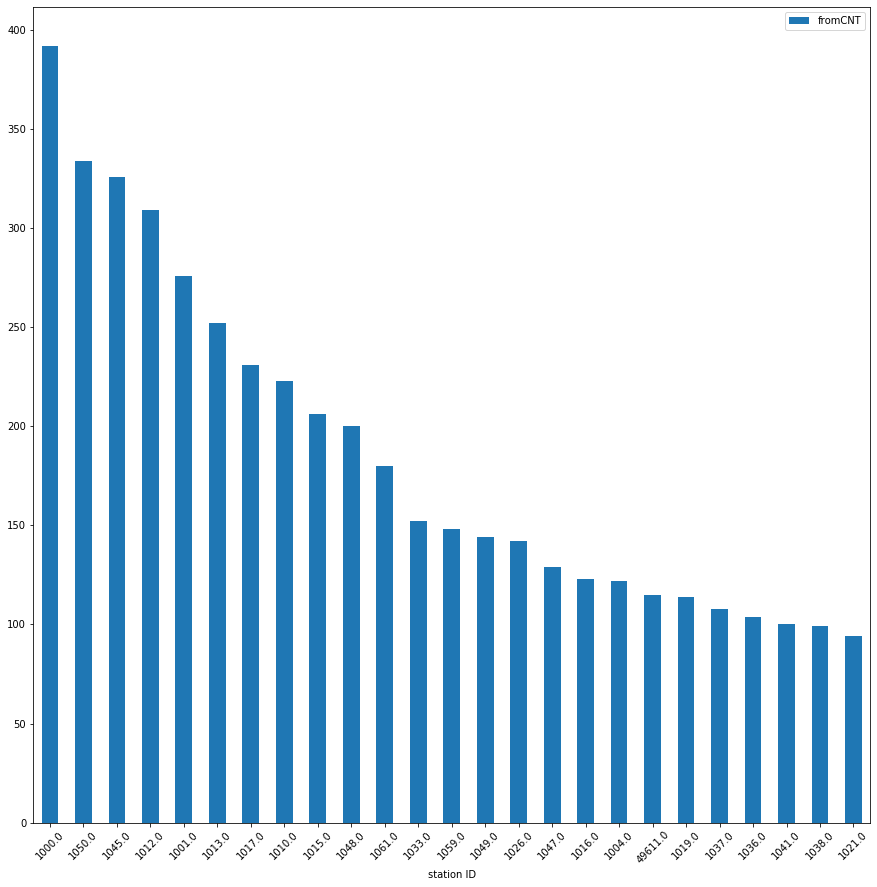

In [1094]:
task_2_1 = pd.DataFrame({'station ID':filtered_month['Station id'], 'fromCNT':filtered_month['fromCNT']})
ax = task_2_1.plot.bar(x='station ID', y='fromCNT', rot=45, figsize=(15,15))

### Task 2.2

In [1072]:
filter_stationID

'1000'

In [1095]:
data

,Starttime_month,Starttime,Station id,fromCNT,toCNT,rebalCNT
0,1,1/1/19,1000.0,4.0,4.0,0.0
1,1,1/1/19,1002.0,1.0,1.0,0.0
2,1,1/1/19,1006.0,0.0,1.0,0.0
3,1,1/1/19,1009.0,1.0,0.0,0.0
4,1,1/1/19,1010.0,1.0,1.0,0.0
...,...,...,...,...,...,...
22222,9,9/9/19,49741.0,5.0,2.0,1.0
22223,9,9/9/19,49801.0,3.0,2.0,1.0
22224,9,9/9/19,49881.0,2.0,0.0,0.0
22225,9,9/9/19,49921.0,3.0,2.0,2.0


In [1099]:
filter_stationID = float(filter_stationID )

In [1125]:
filtered_month_ID = data[data["Station id"] == filter_stationID]
filtered_month_ID

,Starttime_month,Starttime,Station id,fromCNT,toCNT,rebalCNT
63,1,1/10/19,1046.0,1.0,1.0,0.0
163,1,1/12/19,1046.0,1.0,0.0,0.0
239,1,1/14/19,1046.0,0.0,3.0,1.0
301,1,1/15/19,1046.0,1.0,2.0,1.0
361,1,1/16/19,1046.0,1.0,2.0,0.0
...,...,...,...,...,...,...
21756,9,9/5/19,1046.0,7.0,6.0,2.0
21865,9,9/6/19,1046.0,6.0,4.0,2.0
21965,9,9/7/19,1046.0,4.0,5.0,3.0
22068,9,9/8/19,1046.0,2.0,4.0,0.0


In [1136]:
filtered_month_ID = filtered_month_ID[filtered_month_ID.Starttime_month == filter_month]
filtered_month_ID

,Starttime_month,Starttime,Station id,fromCNT,toCNT,rebalCNT
4888,4,4/1/19,1046.0,0.0,3.0,1.0
4972,4,4/10/19,1046.0,0.0,4.0,4.0
5070,4,4/11/19,1046.0,6.0,9.0,4.0
5162,4,4/12/19,1046.0,1.0,2.0,0.0
5252,4,4/13/19,1046.0,10.0,5.0,0.0
5339,4,4/14/19,1046.0,0.0,1.0,1.0
5418,4,4/15/19,1046.0,0.0,2.0,2.0
5501,4,4/16/19,1046.0,2.0,5.0,2.0
5597,4,4/17/19,1046.0,2.0,4.0,1.0
5694,4,4/18/19,1046.0,3.0,2.0,0.0


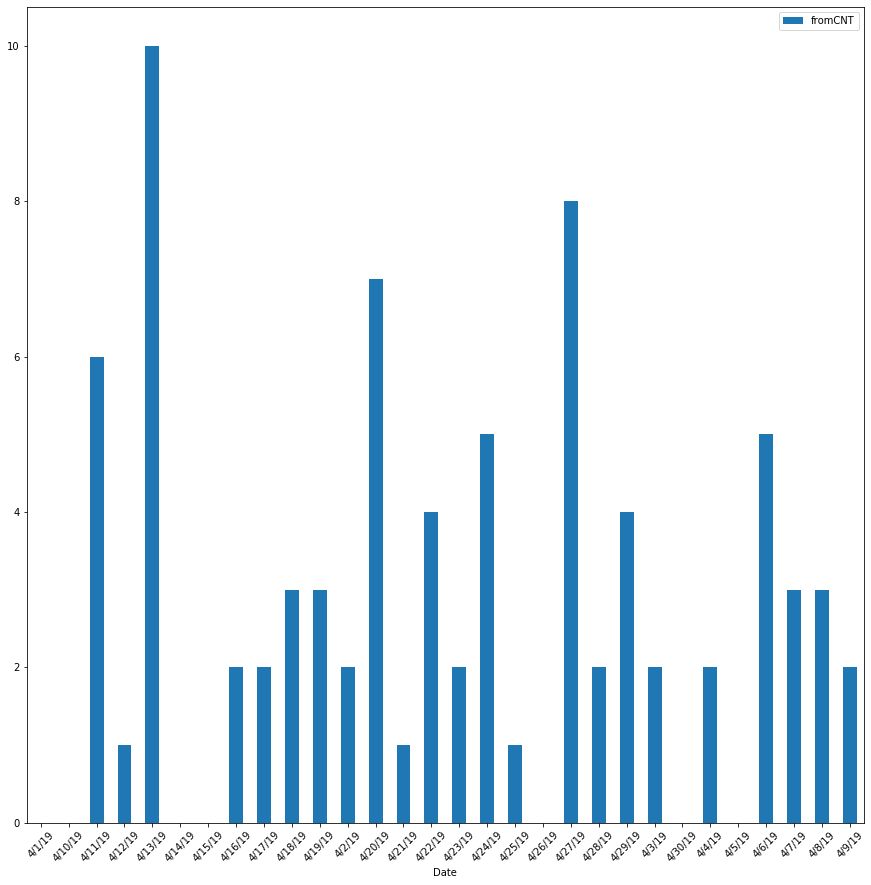

In [1137]:
task_2_2 = pd.DataFrame({'Date':filtered_month_ID['Starttime'], 'fromCNT':filtered_month_ID['fromCNT']})
bx = task_2_2.plot.bar(x='Date', y='fromCNT', rot=45, figsize=(15,15))

### Task 2.3

In [1263]:
df = pd.read_csv('HealthyRideRentals2019-Q1.csv')
df
df2 = pd.read_csv('HealthyRideRentals2019-Q2.csv')
df2
df3 = pd.read_csv('HealthyRideRentals2019-Q3.csv')
df3

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,76836470,7/1/19 0:26,7/1/19 0:28,70175,128,1036.0,Schenley Dr at Schenley Plaza (Carnegie Librar...,1036.0,Schenley Dr at Schenley Plaza (Carnegie Librar...,Subscriber
1,76836841,7/1/19 0:34,7/1/19 0:51,70538,1030,1037.0,Frew St & Schenley Dr,1070.0,Hobart St & Wightman St,Subscriber
2,76840839,7/1/19 1:29,7/1/19 1:39,70383,609,1033.0,Ivy St & Walnut St,1021.0,Taylor St & Liberty Ave,Subscriber
3,76841994,7/1/19 1:39,7/1/19 1:49,70597,604,1021.0,Taylor St & Liberty Ave,1017.0,21st St & Penn Ave,Subscriber
4,76850867,7/1/19 3:02,7/1/19 3:11,70203,554,NaN,BIKE 70203,1046.0,S 25th St & E Carson St,Customer
...,...,...,...,...,...,...,...,...,...,...
45977,86541515,9/30/19 23:50,10/1/19 0:07,70002,1053,1020.0,42nd & Penn Ave.,1066.0,N Homewood Ave & Finance St (Homewood Station),Subscriber
45978,86541527,9/30/19 23:50,9/30/19 23:58,70238,457,NaN,BIKE 70238,1093.0,S Bouquet Ave & Sennott St,Subscriber
45979,86541540,9/30/19 23:51,9/30/19 23:56,70441,317,1049.0,S 12th St & E Carson St,NaN,BIKE 70441,Customer
45980,86541589,9/30/19 23:54,10/1/19 0:48,70687,3267,1099.0,Forbes Ave & S Craig St,NaN,BIKE 70687,Customer


In [1264]:
updated = pd.concat([df, df2])
updated = pd.concat([updated, df3])
# data = data.fillna(0)
# data = data.reset_index()

In [1265]:
updated

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,63918850,1/5/19 16:02,1/5/19 17:35,70585,5624,1025.0,Penn Ave & N Fairmount St,1025.0,Penn Ave & N Fairmount St,Customer
1,63920576,1/5/19 21:18,1/5/19 21:22,70585,232,1025.0,Penn Ave & N Fairmount St,1026.0,Penn Ave & S Whitfield St,Customer
2,64076019,1/15/19 14:09,1/15/19 14:20,70147,705,1028.0,Penn Ave & Putnam St (Bakery Square),49371.0,E Liberty Blvd & Larimer Ave,Customer
3,64281721,1/28/19 16:34,1/28/19 17:27,70658,3201,1041.0,Fifth Ave & S Bouquet St,1066.0,N Homewood Ave & Finance St (Homewood Station),Subscriber
4,64316376,1/30/19 17:52,1/30/19 19:05,70206,4361,1047.0,S 22nd St & E Carson St,49771.0,Fifth Ave & Jumonville St,Customer
...,...,...,...,...,...,...,...,...,...,...
45977,86541515,9/30/19 23:50,10/1/19 0:07,70002,1053,1020.0,42nd & Penn Ave.,1066.0,N Homewood Ave & Finance St (Homewood Station),Subscriber
45978,86541527,9/30/19 23:50,9/30/19 23:58,70238,457,NaN,BIKE 70238,1093.0,S Bouquet Ave & Sennott St,Subscriber
45979,86541540,9/30/19 23:51,9/30/19 23:56,70441,317,1049.0,S 12th St & E Carson St,NaN,BIKE 70441,Customer
45980,86541589,9/30/19 23:54,10/1/19 0:48,70687,3267,1099.0,Forbes Ave & S Craig St,NaN,BIKE 70687,Customer


In [1266]:
new = updated['Starttime'].str.split("/", n = 1, expand = True)
updated['Starttime_month'] = new[0]
new = updated['Starttime'].str.split(" ", n = 1, expand = True)
updated['Starttime'] = new[0]

In [1267]:
# task_2_rgf = task_2_rgf.rename(columns={"To station id": "Station id"})
# task_2_rgf = task_2_rgf.rename(columns={"rebal_data_CNT": "rebalCNT"})
updated_bikeid = updated.groupby(['Starttime_month','Starttime','Bikeid']).count()
updated_bikeid = updated_bikeid.rename(columns={"Trip id": "numberCNT"})
updated_bikeid = updated_bikeid.reset_index()

In [1268]:
updated_bikeid = updated_bikeid[['Starttime_month', 'Starttime', 'Bikeid', 'numberCNT']]

In [1269]:
updated_bikeid = updated_bikeid.reset_index(drop = True)

In [1270]:
updated_bikeid

,Starttime_month,Starttime,Bikeid,numberCNT
0,1,1/1/19,70003,1
1,1,1/1/19,70010,1
2,1,1/1/19,70038,1
3,1,1/1/19,70084,1
4,1,1/1/19,70099,1
...,...,...,...,...
46460,9,9/9/19,70677,1
46461,9,9/9/19,70682,1
46462,9,9/9/19,70688,2
46463,9,9/9/19,70689,1


In [1271]:
updated_bikeid = updated_bikeid[updated_bikeid.Starttime_month == filter_month]
updated_bikeid

,Starttime_month,Starttime,Bikeid,numberCNT
5455,4,4/1/19,70000,1
5456,4,4/1/19,70002,1
5457,4,4/1/19,70003,1
5458,4,4/1/19,70005,1
5459,4,4/1/19,70012,1
...,...,...,...,...
11034,4,4/9/19,70681,1
11035,4,4/9/19,70682,2
11036,4,4/9/19,70685,5
11037,4,4/9/19,70687,1


In [1278]:
task_2_3 = updated_bikeid.sort_values(by=['numberCNT'], ascending = False).head(25)
task_2_3

,Starttime_month,Starttime,Bikeid,numberCNT
8218,4,4/22/19,70513,18
6317,4,4/13/19,70382,9
5567,4,4/1/19,70557,8
5593,4,4/1/19,70633,8
5608,4,4/1/19,70680,8
10239,4,4/6/19,70387,8
7366,4,4/18/19,70606,7
8194,4,4/22/19,70446,7
10326,4,4/6/19,70581,7
5843,4,4/11/19,70234,7


(0, 25)

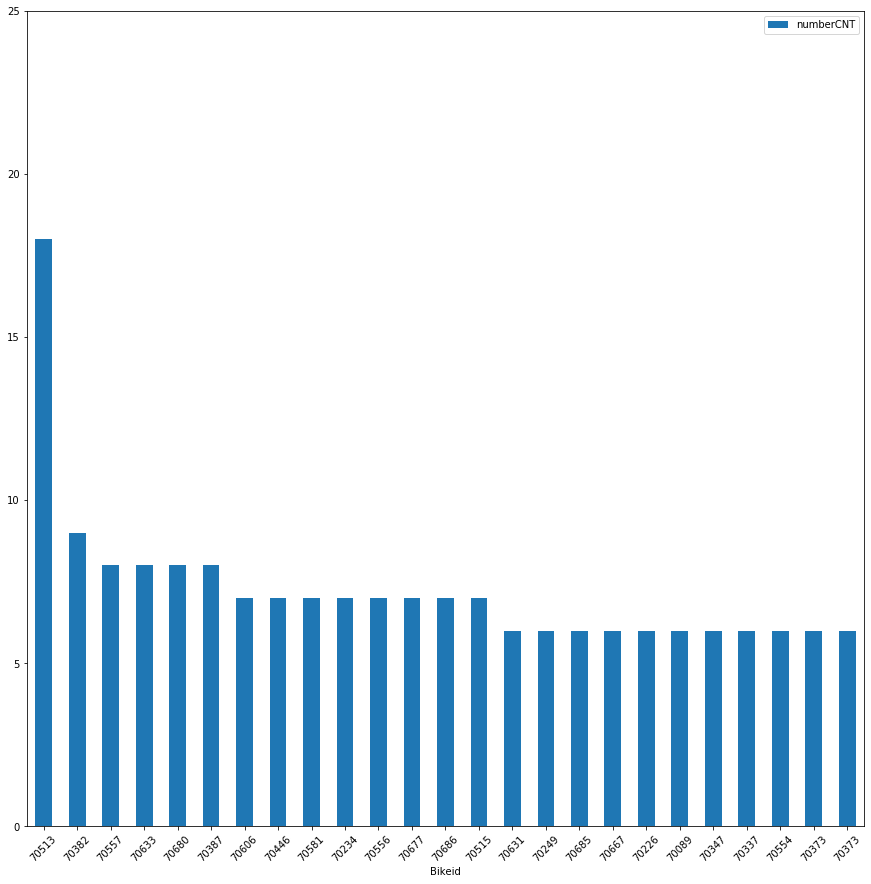

In [1286]:
task_2_3_plot = pd.DataFrame({'Bikeid':task_2_3['Bikeid'], 'numberCNT':task_2_3['numberCNT']})
dx = task_2_3_plot.plot.bar(x='Bikeid', y='numberCNT', rot=45, figsize=(15,15))
dx.set_ylim((0,25))

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

In [1105]:
data

,Starttime_month,Starttime,Station id,fromCNT,toCNT,rebalCNT
0,1,1/1/19,1000.0,4.0,4.0,0.0
1,1,1/1/19,1002.0,1.0,1.0,0.0
2,1,1/1/19,1006.0,0.0,1.0,0.0
3,1,1/1/19,1009.0,1.0,0.0,0.0
4,1,1/1/19,1010.0,1.0,1.0,0.0
...,...,...,...,...,...,...
22222,9,9/9/19,49741.0,5.0,2.0,1.0
22223,9,9/9/19,49801.0,3.0,2.0,1.0
22224,9,9/9/19,49881.0,2.0,0.0,0.0
22225,9,9/9/19,49921.0,3.0,2.0,2.0


### Task 3.1

In [1112]:
data["Starttime_month"].value_counts()

8    3071
9    3068
7    3045
5    2923
6    2667
4    2605
3    1980
2    1458
1    1410
Name: Starttime_month, dtype: int64

In [1128]:
filter_month = str(filter_month)
filter_month

'4'

In [1133]:
filtered_rebal = data[data.Starttime_month == filter_month]
filtered_rebal

,Starttime_month,Starttime,Station id,fromCNT,toCNT,rebalCNT
4848,4,4/1/19,1000.0,9.0,4.0,3.0
4849,4,4/1/19,1001.0,3.0,7.0,5.0
4850,4,4/1/19,1002.0,4.0,6.0,1.0
4851,4,4/1/19,1003.0,1.0,2.0,0.0
4852,4,4/1/19,1004.0,3.0,2.0,2.0
...,...,...,...,...,...,...
7448,4,4/9/19,49731.0,2.0,1.0,1.0
7449,4,4/9/19,49771.0,1.0,0.0,0.0
7450,4,4/9/19,49881.0,1.0,2.0,1.0
7451,4,4/9/19,49921.0,1.0,1.0,0.0


In [1140]:
filtered_rebal = filtered_rebal.sort_values(by = "rebalCNT", ascending = False).head(25)

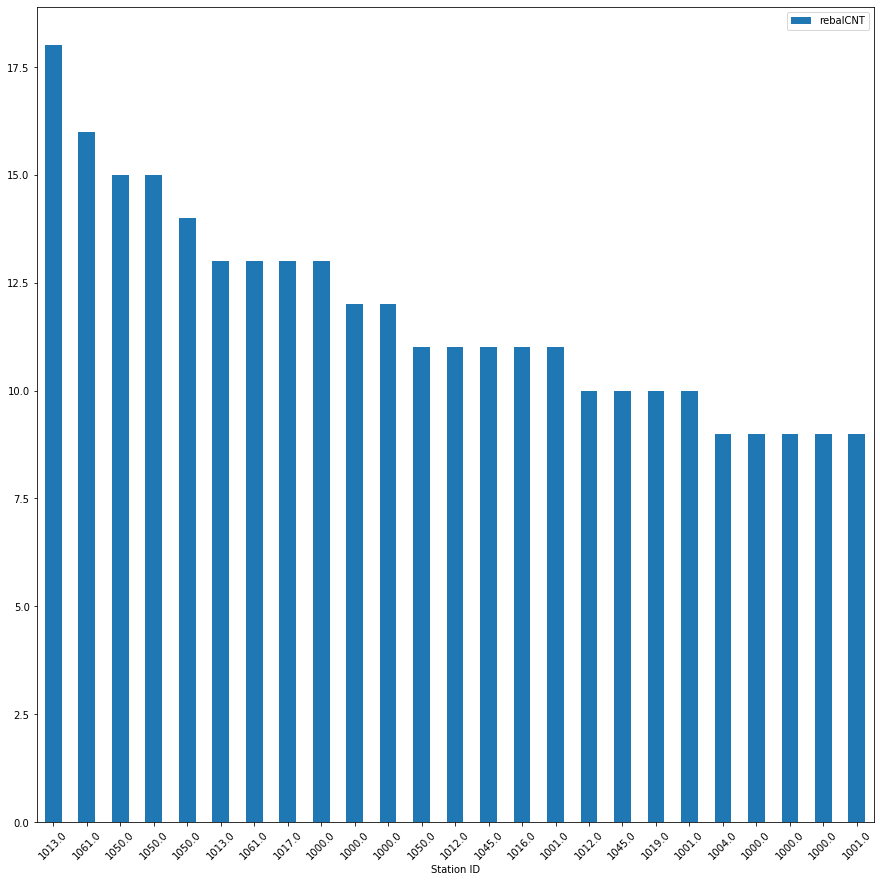

In [1141]:
task_3_1 = pd.DataFrame({'Station ID':filtered_rebal['Station id'], 'rebalCNT':filtered_rebal['rebalCNT']})
cx = task_3_1.plot.bar(x='Station ID', y='rebalCNT', rot=45, figsize=(15,15))

### Task 3.2

In [1149]:
filtered_month_ID = filtered_month_ID.sort_values("Starttime")
filtered_month_ID

,Starttime_month,Starttime,Station id,fromCNT,toCNT,rebalCNT
4888,4,4/1/19,1046.0,0.0,3.0,1.0
4972,4,4/10/19,1046.0,0.0,4.0,4.0
5070,4,4/11/19,1046.0,6.0,9.0,4.0
5162,4,4/12/19,1046.0,1.0,2.0,0.0
5252,4,4/13/19,1046.0,10.0,5.0,0.0
5339,4,4/14/19,1046.0,0.0,1.0,1.0
5418,4,4/15/19,1046.0,0.0,2.0,2.0
5501,4,4/16/19,1046.0,2.0,5.0,2.0
5597,4,4/17/19,1046.0,2.0,4.0,1.0
5694,4,4/18/19,1046.0,3.0,2.0,0.0


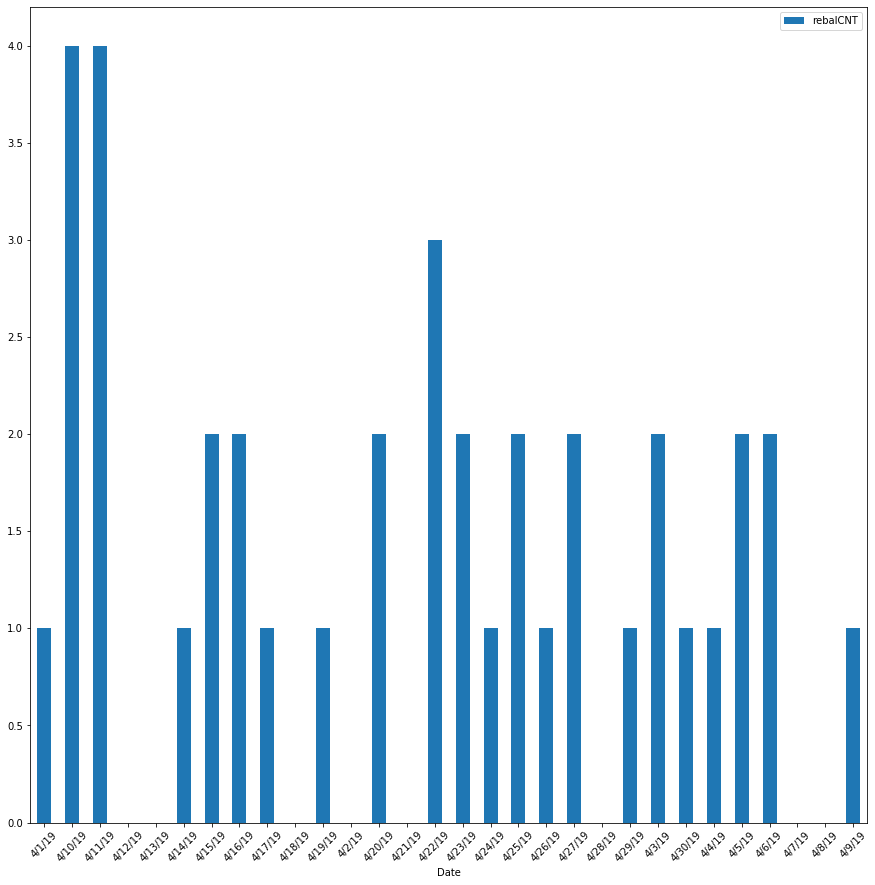

In [1148]:
task_3_2 = pd.DataFrame({'Date':filtered_month_ID['Starttime'], 'rebalCNT':filtered_month_ID['rebalCNT']})
dx = task_3_2.plot.bar(x='Date', y='rebalCNT', rot=45, figsize=(15,15))

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

In [1498]:
df3 = pd.read_csv('HealthyRideRentals2019-Q3.csv')
df3

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,76836470,7/1/19 0:26,7/1/19 0:28,70175,128,1036.0,Schenley Dr at Schenley Plaza (Carnegie Librar...,1036.0,Schenley Dr at Schenley Plaza (Carnegie Librar...,Subscriber
1,76836841,7/1/19 0:34,7/1/19 0:51,70538,1030,1037.0,Frew St & Schenley Dr,1070.0,Hobart St & Wightman St,Subscriber
2,76840839,7/1/19 1:29,7/1/19 1:39,70383,609,1033.0,Ivy St & Walnut St,1021.0,Taylor St & Liberty Ave,Subscriber
3,76841994,7/1/19 1:39,7/1/19 1:49,70597,604,1021.0,Taylor St & Liberty Ave,1017.0,21st St & Penn Ave,Subscriber
4,76850867,7/1/19 3:02,7/1/19 3:11,70203,554,NaN,BIKE 70203,1046.0,S 25th St & E Carson St,Customer
...,...,...,...,...,...,...,...,...,...,...
45977,86541515,9/30/19 23:50,10/1/19 0:07,70002,1053,1020.0,42nd & Penn Ave.,1066.0,N Homewood Ave & Finance St (Homewood Station),Subscriber
45978,86541527,9/30/19 23:50,9/30/19 23:58,70238,457,NaN,BIKE 70238,1093.0,S Bouquet Ave & Sennott St,Subscriber
45979,86541540,9/30/19 23:51,9/30/19 23:56,70441,317,1049.0,S 12th St & E Carson St,NaN,BIKE 70441,Customer
45980,86541589,9/30/19 23:54,10/1/19 0:48,70687,3267,1099.0,Forbes Ave & S Craig St,NaN,BIKE 70687,Customer


In [1499]:
quarter = df3

In [1500]:
new = quarter['Starttime'].str.split("/", n = 1, expand = True)
quarter['Starttime_month'] = new[0]
new = quarter['Starttime'].str.split(" ", n = 1, expand = True)
quarter['Starttime'] = new[0]

In [1501]:
quarter = quarter.rename(columns={"From station id": "Station id"})
for i, rows in quarter.iterrows():
    if rows["Station id"]=="":
        quarter.at[i, 'Trip id']=0


quarter = quarter.groupby(["Starttime_month", 'Starttime', 'Station id']).count()
quarter = quarter.rename(columns={"Trip id": "fromCNT"})


In [1502]:
#quarter = quarter.reset_index()
quarter

fromCNT  Stoptime  Bikeid  Tripduration  \
Starttime_month Starttime Station id                                            
7               7/1/19    1000.0           27        27      27            27   
                          1001.0           18        18      18            18   
                          1002.0            7         7       7             7   
                          1003.0            4         4       4             4   
                          1004.0            7         7       7             7   
...                                       ...       ...     ...           ...   
9               9/9/19    49741.0           5         5       5             5   
                          49801.0           3         3       3             3   
                          49881.0           2         2       2             2   
                          49921.0           3         3       3             3   
                          49951.0           2         2       2             2   

                                      From station name  To station id  \
Starttime_month Starttime Station id                                     
7               7/1/19    1000.0                     27             23   
                          1001.0                     18             17   
                          1002.0                      7              6   
                          1003.0                      4              4   
                          1004.0                      7              6   
...                                                 ...            ...   
9               9/9/19    49741.0                     5              5   
                          49801.0                     3              3   
                          49881.0                     2              2   
                          49921.0                     3              2   
                          49951.0                     2              1   

                                      To station name  Usertype  
Starttime_month Starttime Station id                             
7               7/1/19    1000.0                   27        27  
                          1001.0                   18        18  
                          1002.0                    7         7  
                          1003.0                    4         4  
                          1004.0                    7         7  
...                                               ...       ...  
9               9/9/19    49741.0                   5         5  
                          49801.0                   3         3  
                          49881.0                   2         2  
                          49921.0                   3         3  
                          49951.0                   2         2  

[8707 rows x 8 columns]

In [1540]:
quarter_2 = df3

In [1541]:
quarter_2["rebal_data_CNT"] = 0

In [1542]:
new = quarter_2['Starttime'].str.split("/", n = 1, expand = True)
quarter_2['Starttime_month'] = new[0]
new = quarter_2['Starttime'].str.split(" ", n = 1, expand = True)
quarter_2['Starttime'] = new[0]

In [1543]:
row_iterator = quarter_2.iterrows()
_, last = row_iterator.__next__()  # take first item from row_iterator
data_index = 0


for i, row in row_iterator:
    if last['Bikeid'] == row['Bikeid']:
        if last['To station id'] != row['From station id']:
            k = data_index+1
            #print(k)
            quarter_2.at[k, 'rebal_data_CNT'] = 1
            if last['To station id'] == "":
                quarter_2.at[k, 'rebal_data_CNT'] = 0
    data_index = data_index + 1
    last = row


In [1544]:
quarter_2 = quarter_2.reset_index(drop = True)
quarter_2

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,Starttime_month,rebal_data_CNT
0,76836470,7/1/19,7/1/19 0:28,70175,128,1036.0,Schenley Dr at Schenley Plaza (Carnegie Librar...,1036.0,Schenley Dr at Schenley Plaza (Carnegie Librar...,Subscriber,7,0
1,76836841,7/1/19,7/1/19 0:51,70538,1030,1037.0,Frew St & Schenley Dr,1070.0,Hobart St & Wightman St,Subscriber,7,0
2,76840839,7/1/19,7/1/19 1:39,70383,609,1033.0,Ivy St & Walnut St,1021.0,Taylor St & Liberty Ave,Subscriber,7,0
3,76841994,7/1/19,7/1/19 1:49,70597,604,1021.0,Taylor St & Liberty Ave,1017.0,21st St & Penn Ave,Subscriber,7,0
4,76850867,7/1/19,7/1/19 3:11,70203,554,NaN,BIKE 70203,1046.0,S 25th St & E Carson St,Customer,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45977,86541515,9/30/19,10/1/19 0:07,70002,1053,1020.0,42nd & Penn Ave.,1066.0,N Homewood Ave & Finance St (Homewood Station),Subscriber,9,0
45978,86541527,9/30/19,9/30/19 23:58,70238,457,NaN,BIKE 70238,1093.0,S Bouquet Ave & Sennott St,Subscriber,9,0
45979,86541540,9/30/19,9/30/19 23:56,70441,317,1049.0,S 12th St & E Carson St,NaN,BIKE 70441,Customer,9,0
45980,86541589,9/30/19,10/1/19 0:48,70687,3267,1099.0,Forbes Ave & S Craig St,NaN,BIKE 70687,Customer,9,0


In [1545]:
quarter_2 = quarter_2.rename(columns={"To station id": "Station id"})
quarter_2 = quarter_2.rename(columns={"rebal_data_CNT": "rebalCNT"})
quarter_2 = quarter_2.groupby(['Starttime_month', 'Starttime', 'Station id']).sum()
#quarter_2 = quarter_2.reset_index()

In [1546]:
quarter_2

Trip id   Bikeid  Tripduration  \
Starttime_month Starttime Station id                                      
7               7/1/19    1000.0      2000344869  1829953         78569   
                          1001.0      1538644681  1408402        256697   
                          1002.0        76923717    70143        153103   
                          1003.0       230705297   211348        142159   
                          1004.0       461678215   422063        195906   
...                                          ...      ...           ...   
9               9/9/19    49731.0       84656170    70352          1392   
                          49741.0      169363667   141230          4996   
                          49801.0      169414644   141016          1974   
                          49921.0      169405353   140695           833   
                          49951.0      423484650   351808          5441   

                                      From station id  rebalCNT  
Starttime_month Starttime Station id                             
7               7/1/19    1000.0             121188.0         0  
                          1001.0             165007.0         0  
                          1002.0              49691.0         0  
                          1003.0               2122.0         0  
                          1004.0              54755.0         0  
...                                               ...       ...  
9               9/9/19    49731.0              1019.0         0  
                          49741.0             50741.0         0  
                          49801.0             50616.0         0  
                          49921.0             49691.0         0  
                          49951.0              4029.0         0  

[8052 rows x 5 columns]

In [1599]:
quarter_result = pd.concat([quarter_2, quarter], axis=1, sort=False)

In [1600]:
quarter_result

Trip id     Bikeid  Tripduration  \
Starttime_month Starttime Station id                                          
7               7/1/19    1000.0      2.000345e+09  1829953.0       78569.0   
                          1001.0      1.538645e+09  1408402.0      256697.0   
                          1002.0      7.692372e+07    70143.0      153103.0   
                          1003.0      2.307053e+08   211348.0      142159.0   
                          1004.0      4.616782e+08   422063.0      195906.0   
...                                            ...        ...           ...   
9               9/9/19    49741.0     1.693637e+08   141230.0        4996.0   
                          49801.0     1.694146e+08   141016.0        1974.0   
                          49881.0              NaN        NaN           NaN   
                          49921.0     1.694054e+08   140695.0         833.0   
                          49951.0     4.234846e+08   351808.0        5441.0   

                                      From station id  rebalCNT  fromCNT  \
Starttime_month Starttime Station id                                       
7               7/1/19    1000.0             121188.0       0.0     27.0   
                          1001.0             165007.0       0.0     18.0   
                          1002.0              49691.0       0.0      7.0   
                          1003.0               2122.0       0.0      4.0   
                          1004.0              54755.0       0.0      7.0   
...                                               ...       ...      ...   
9               9/9/19    49741.0             50741.0       0.0      5.0   
                          49801.0             50616.0       0.0      3.0   
                          49881.0                 NaN       NaN      2.0   
                          49921.0             49691.0       0.0      3.0   
                          49951.0              4029.0       0.0      2.0   

                                      Stoptime  Bikeid  Tripduration  \
Starttime_month Starttime Station id                                   
7               7/1/19    1000.0          27.0    27.0          27.0   
                          1001.0          18.0    18.0          18.0   
                          1002.0           7.0     7.0           7.0   
                          1003.0           4.0     4.0           4.0   
                          1004.0           7.0     7.0           7.0   
...                                        ...     ...           ...   
9               9/9/19    49741.0          5.0     5.0           5.0   
                          49801.0          3.0     3.0           3.0   
                          49881.0          2.0     2.0           2.0   
                          49921.0          3.0     3.0           3.0   
                          49951.0          2.0     2.0           2.0   

                                      From station name  To station id  \
Starttime_month Starttime Station id                                     
7               7/1/19    1000.0                   27.0           23.0   
                          1001.0                   18.0           17.0   
                          1002.0                    7.0            6.0   
                          1003.0                    4.0            4.0   
                          1004.0                    7.0            6.0   
...                                                 ...            ...   
9               9/9/19    49741.0                   5.0            5.0   
                          49801.0                   3.0            3.0   
                          49881.0                   2.0            2.0   
                          49921.0                   3.0            2.0   
                          49951.0                   2.0            1.0   

                                      To station name  Usertype  
Starttime_month Starttime Station id                        

In [1601]:
quarter_result = quarter_result.reset_index()

In [1602]:
quarter_result = quarter_result.fillna(0)

quarter_result = quarter_result[['Starttime_month', 'Station id', 'rebalCNT', 'fromCNT']]
quarter_result = quarter_result.groupby(["Station id","Starttime_month"]).sum()

In [1603]:
quarter_result

rebalCNT  fromCNT
Station id Starttime_month                   
666.0      7                     0.0      1.0
           8                     0.0      2.0
1000.0     7                     1.0    672.0
           8                     0.0    586.0
           9                     1.0    522.0
...                              ...      ...
49921.0    9                     0.0    106.0
49951.0    7                     0.0     92.0
           8                     0.0    133.0
           9                     0.0    118.0
90097.0    7                     0.0      2.0

[350 rows x 2 columns]

In [1604]:
quarter_result.reset_index()

,Station id,Starttime_month,rebalCNT,fromCNT
0,666.0,7,0.0,1.0
1,666.0,8,0.0,2.0
2,1000.0,7,1.0,672.0
3,1000.0,8,0.0,586.0
4,1000.0,9,1.0,522.0
...,...,...,...,...
345,49921.0,9,0.0,106.0
346,49951.0,7,0.0,92.0
347,49951.0,8,0.0,133.0
348,49951.0,9,0.0,118.0


TypeError: '(slice(None, None, None), 0)' is an invalid key

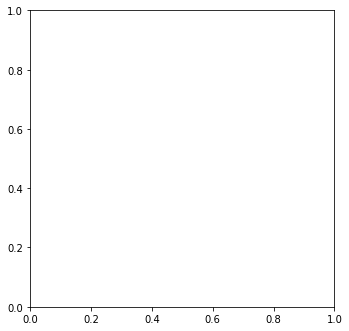

In [1607]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X = quarter_result
# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 10], X_varied[:, 11], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

### Task 4.2

### Task 4.3